In [1554]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torchinfo import summary
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, Subset
import time
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.model_selection import KFold

In [1555]:
df = pd.read_csv('/Users/mogankumarnarsozhan/Documents/NN_Project/dataset.csv')

In [1556]:
df.replace(['f', 'e', 'd', 'b', 'c', 'a'], np.nan, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')
df.dropna(inplace=True)

In [1557]:
X = df.drop(columns='target')
y = df['target']

#Sampling the data
df_majority = df[df.target == 0]
df_minority = df[df.target == 1]

df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)

df_upsampled = pd.concat([df_majority, df_minority_upsampled])

X_upsampled = df_upsampled.drop(columns='target')
y_upsampled = df_upsampled['target']

#Splitting into training, testing and validation set
X_train, X_test, y_train, y_test = train_test_split(X_upsampled, y_upsampled, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

#Scaling the values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)
X_test = scaler.fit_transform(X_test)

In [1558]:
print("Shape of entire df:", df.shape)
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_val:", y_val.shape)

Shape of entire df: (760, 8)
Shape of X_train: (800, 7)
Shape of y_train: (800,)
Shape of X_test: (99, 7)
Shape of y_test: (99,)
Shape of X_val: (89, 7)
Shape of y_val: (89,)


In [1559]:
X_train_tensor = torch.tensor(X_train).float()
y_train_tensor = torch.tensor(y_train.values).int()

X_val_tensor = torch.tensor(X_val).float()
y_val_tensor = torch.tensor(y_val.values).int()

X_test_tensor = torch.tensor(X_test).float()
y_test_tensor = torch.tensor(y_test.values).int()

In [1560]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
    
        self.fc1 = nn.Linear(7, 256)  # Input layer
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.3)

        self.fc2 = nn.Linear(256, 128)  # Hidden layers
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.3)

        self.fc3 = nn.Linear(128, 64)
        self.relu3 = nn.ReLU()
        self.dropout3 = nn.Dropout(0.3)

        self.fc4 = nn.Linear(64, 32)
        self.relu4 = nn.ReLU()
        self.dropout4 = nn.Dropout(0.3)

        self.fc5 = nn.Linear(32, 1)  # Output layer
        self.sigmoid = nn.Sigmoid()  # Using sigmoid because of Binary Target

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.dropout3(x)
        x = self.fc4(x)
        x = self.relu4(x)
        x = self.dropout4(x)
        x = self.fc5(x)
        x = self.sigmoid(x)
        return x

model = NeuralNetwork()
summary(model, input_size=(1, 7))

Layer (type:depth-idx)                   Output Shape              Param #
NeuralNetwork                            [1, 1]                    --
├─Linear: 1-1                            [1, 256]                  2,048
├─ReLU: 1-2                              [1, 256]                  --
├─Dropout: 1-3                           [1, 256]                  --
├─Linear: 1-4                            [1, 128]                  32,896
├─ReLU: 1-5                              [1, 128]                  --
├─Dropout: 1-6                           [1, 128]                  --
├─Linear: 1-7                            [1, 64]                   8,256
├─ReLU: 1-8                              [1, 64]                   --
├─Dropout: 1-9                           [1, 64]                   --
├─Linear: 1-10                           [1, 32]                   2,080
├─ReLU: 1-11                             [1, 32]                   --
├─Dropout: 1-12                          [1, 32]                   --
├─

In [1561]:
batch= 16
learning_rate = 0.01
loss_function = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [1562]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size= batch, shuffle = True)
val_loader = DataLoader(val_dataset, batch_size= batch, shuffle = False)
test_loader = DataLoader(test_dataset, batch_size=batch, shuffle = False)

**Dropout rates as hyper parameter**

In [1563]:
class NeuralNetwork(nn.Module):
    def __init__(self, dropout1, dropout2, dropout3, dropout4):
        super(NeuralNetwork, self).__init__()
    
        self.fc1 = nn.Linear(7, 256)  # Input layer
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout1)

        self.fc2 = nn.Linear(256, 128)  # Hidden layers
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout2)

        self.fc3 = nn.Linear(128, 64)
        self.relu3 = nn.ReLU()
        self.dropout3 = nn.Dropout(dropout3)

        self.fc4 = nn.Linear(64, 32)
        self.relu4 = nn.ReLU()
        self.dropout4 = nn.Dropout(dropout4)

        self.fc5 = nn.Linear(32, 1)  # Output layer
        self.sigmoid = nn.Sigmoid()  # Using sigmoid because of Binary Target

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.dropout3(x)
        x = self.fc4(x)
        x = self.relu4(x)
        x = self.dropout4(x)
        x = self.fc5(x)
        x = self.sigmoid(x)
        return x
 
dropouts_rates = [0.1, 0.3, 0.5, 0.7]
results = []

for rate in dropouts_rates:
    model = NeuralNetwork(dropout1 = rate, dropout2 = rate, dropout3 = rate, dropout4 = rate)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    summary(model, input_size=(1, 7))

    best_val_loss = float('inf')
    num_epochs = 500
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []
    test_losses = []
    test_accuracies = []

    start_time = time.time()

    for epoch in range(num_epochs): #defining the training loop
        
        model.train() #model in training mode
        training_loss = 0.0
        correct_predictions = 0
        total_predictions = 0 
        for inputs, labels in train_loader:

            outputs = model(inputs).squeeze()  # output -> predictions   :   labels -> actual values [ 1 or 0 ]
            loss = loss_function(outputs, labels.float())  # loss is calsulated between predicted and the actual values
            optimizer.zero_grad()  # Before backpropagation, initialize all weights to zero 
            loss.backward()  # performs backward propagation
            optimizer.step()  # updates the parameters learnt from backpropagation (weights)

            training_loss += loss.item()  # .item() - extracts the scalar value of the loss tensor. Loss is calculated per batch

            predicted = torch.round(outputs)  # Convert probabilities to binary predictions 
            correct_predictions += (predicted == labels).sum().item()  #creates a tensor oa maps how many actually match that conditon
            total_predictions += labels.size(0)  #first dimension of the tensor

        train_losses.append(training_loss / len(train_loader))  #for loss calculation
        train_accuracies.append(correct_predictions / total_predictions)


        model.eval()  #model in evaluation mode
        val_loss = 0.0
        val_correct_predictions = 0
        val_total_predictions = 0
        with torch.no_grad():
            for val_inputs, val_labels in val_loader:
                val_outputs = model(val_inputs).squeeze()
                val_loss += loss_function(val_outputs, val_labels.float()).item()

                predicted = torch.round(val_outputs)
                val_correct_predictions += (predicted == val_labels).sum().item()
                val_total_predictions += val_labels.size(0)

            val_losses.append(val_loss / len(val_loader))
            val_accuracies.append(val_correct_predictions / val_total_predictions)

        average_training_loss = training_loss / len(train_loader)  #loss per batch
        average_validation_loss = val_loss / len(val_loader)
        training_accuracy = correct_predictions / total_predictions  
        validation_accuracy = val_correct_predictions / val_total_predictions

        print(f'Epoch [{epoch + 1}/{num_epochs}], '
                f'Training Loss: {average_training_loss:.4f}, '
                f'Validation Loss: {average_validation_loss:.4f}, '
                f'Training Accuracy: {training_accuracy:.4f}, '
                f'Validation Accuracy: {validation_accuracy:.4f}')
        
        if average_validation_loss < best_val_loss:
            best_val_loss = average_validation_loss
            torch.save(model.state_dict(), 'best_model_weights.pth')

    end_time = time.time()
    print(f'Training Time: {end_time - start_time:.2f} seconds')


    model.load_state_dict(torch.load('best_model_weights.pth'))

    # num_epochss = 600
    for epoch in range(num_epochs):
        model.eval()
        test_loss = 0.0
        test_correct_predictions = 0
        test_total_predictions = 0

        confusion_predictions = []
        confusion_labels = []

        with torch.no_grad():
            for test_inputs, test_labels in test_loader:
                test_outputs = model(test_inputs).squeeze()
                test_loss += loss_function(test_outputs, test_labels.float()).item()
                
                predicted = torch.round(test_outputs)
                test_correct_predictions += (predicted == test_labels.float()).sum().item()
                test_total_predictions += test_labels.size(0)
            
                confusion_predictions.extend(predicted.numpy())  #for confusion matrix
                confusion_labels.extend(test_labels.numpy())  #actual class labels

            test_losses.append(test_loss / len(test_loader))  # Gives the average loss per batch
            test_accuracies.append(test_correct_predictions / test_total_predictions)  # ratio of correct preds / total preds -> accuracy

        avg_test_loss = test_loss / len(test_loader)
        test_accuracy = test_correct_predictions / test_total_predictions

        print(f'Epoch [{epoch + 1}/{num_epochs}], '
                f'Test Loss: {avg_test_loss:.4f}, '
                f'Testing Accuracy: {test_accuracy:.4f}, ')
        

        results.append({
        'dropout_rate': rate,
        'train_accuracy': training_accuracy,
        'val_accuracy': validation_accuracy,
        'test_accuracy': test_accuracy
    })

for result in results:
    print(f"Dropout Rate: {result['dropout_rate']}, "
          f"Training Accuracy: {result['train_accuracy']:.4f}, "
          f"Validation Accuracy: {result['val_accuracy']:.4f}, "
          f"Testing Accuracy: {result['test_accuracy']:.4f}")
        

Epoch [1/500], Training Loss: 0.5621, Validation Loss: 0.5688, Training Accuracy: 0.7087, Validation Accuracy: 0.7528
Epoch [2/500], Training Loss: 0.5528, Validation Loss: 0.5068, Training Accuracy: 0.7262, Validation Accuracy: 0.7528
Epoch [3/500], Training Loss: 0.5231, Validation Loss: 0.4932, Training Accuracy: 0.7475, Validation Accuracy: 0.7416
Epoch [4/500], Training Loss: 0.5039, Validation Loss: 0.5245, Training Accuracy: 0.7425, Validation Accuracy: 0.7640
Epoch [5/500], Training Loss: 0.5098, Validation Loss: 0.5106, Training Accuracy: 0.7512, Validation Accuracy: 0.7191
Epoch [6/500], Training Loss: 0.4824, Validation Loss: 0.5597, Training Accuracy: 0.7688, Validation Accuracy: 0.6742
Epoch [7/500], Training Loss: 0.4982, Validation Loss: 0.4980, Training Accuracy: 0.7525, Validation Accuracy: 0.7865
Epoch [8/500], Training Loss: 0.4520, Validation Loss: 0.4579, Training Accuracy: 0.7725, Validation Accuracy: 0.8202
Epoch [9/500], Training Loss: 0.5069, Validation Loss: 0

/var/folders/3g/v5ysl19s0hbdkdprhb3xqd4r0000gn/T/ipykernel_34536/2267140078.py:119: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_mode

Epoch [252/500], Test Loss: 0.8876, Testing Accuracy: 0.7778, 
Epoch [253/500], Test Loss: 0.8876, Testing Accuracy: 0.7778, 
Epoch [254/500], Test Loss: 0.8876, Testing Accuracy: 0.7778, 
Epoch [255/500], Test Loss: 0.8876, Testing Accuracy: 0.7778, 
Epoch [256/500], Test Loss: 0.8876, Testing Accuracy: 0.7778, 
Epoch [257/500], Test Loss: 0.8876, Testing Accuracy: 0.7778, 
Epoch [258/500], Test Loss: 0.8876, Testing Accuracy: 0.7778, 
Epoch [259/500], Test Loss: 0.8876, Testing Accuracy: 0.7778, 
Epoch [260/500], Test Loss: 0.8876, Testing Accuracy: 0.7778, 
Epoch [261/500], Test Loss: 0.8876, Testing Accuracy: 0.7778, 
Epoch [262/500], Test Loss: 0.8876, Testing Accuracy: 0.7778, 
Epoch [263/500], Test Loss: 0.8876, Testing Accuracy: 0.7778, 
Epoch [264/500], Test Loss: 0.8876, Testing Accuracy: 0.7778, 
Epoch [265/500], Test Loss: 0.8876, Testing Accuracy: 0.7778, 
Epoch [266/500], Test Loss: 0.8876, Testing Accuracy: 0.7778, 
Epoch [267/500], Test Loss: 0.8876, Testing Accuracy: 0

**Batch size as hyperparameter**

In [1564]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        
        self.fc1 = nn.Linear(7, 256)  # Input layer
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.3)

        self.fc2 = nn.Linear(256, 128)  # Hidden layers
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.3)

        self.fc3 = nn.Linear(128, 64)
        self.relu3 = nn.ReLU()
        self.dropout3 = nn.Dropout(0.3)

        self.fc4 = nn.Linear(64, 32)
        self.relu4 = nn.ReLU()
        self.dropout4 = nn.Dropout(0.3)

        self.fc5 = nn.Linear(32, 1)  # Output layer
        self.sigmoid = nn.Sigmoid()  # Using sigmoid because of Binary Target

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.dropout3(x)
        x = self.fc4(x)
        x = self.relu4(x)
        x = self.dropout4(x)
        x = self.fc5(x)
        x = self.sigmoid(x)
        return x

# Different batch sizes
batch_sizes = [8, 16, 32]
results_batch_size = []

loss_function = nn.BCELoss()
learning_rate = 0.01
num_epochs = 500

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

for batch in batch_sizes:
    train_loader = DataLoader(train_dataset, batch_size=batch, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch, shuffle=False)

    model = NeuralNetwork()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    summary(model, input_size=(1, 7))

    best_val_loss = float('inf')
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    start_time = time.time()

    for epoch in range(num_epochs):
        model.train()
        training_loss = 0.0
        correct_predictions = 0
        total_predictions = 0

        for inputs, labels in train_loader:
            outputs = model(inputs).squeeze()
            loss = loss_function(outputs, labels.float())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            training_loss += loss.item()
            predicted = torch.round(outputs)
            correct_predictions += (predicted == labels).sum().item()
            total_predictions += labels.size(0)

        train_losses.append(training_loss / len(train_loader))
        train_accuracies.append(correct_predictions / total_predictions)

        model.eval()
        val_loss = 0.0
        val_correct_predictions = 0
        val_total_predictions = 0
        with torch.no_grad():
            for val_inputs, val_labels in val_loader:
                val_outputs = model(val_inputs).squeeze()
                val_outputs = val_outputs.view(-1)  
                val_loss += loss_function(val_outputs, val_labels.float()).item()
                predicted = torch.round(val_outputs)
                val_correct_predictions += (predicted == val_labels).sum().item()
                val_total_predictions += val_labels.size(0)

            val_losses.append(val_loss / len(val_loader))
            val_accuracies.append(val_correct_predictions / val_total_predictions)

        average_training_loss = training_loss / len(train_loader)
        average_validation_loss = val_loss / len(val_loader)
        training_accuracy = correct_predictions / total_predictions
        validation_accuracy = val_correct_predictions / val_total_predictions

        print(f'Epoch [{epoch + 1}/{num_epochs}], '
              f'Training Loss: {average_training_loss:.4f}, '
              f'Validation Loss: {average_validation_loss:.4f}, '
              f'Training Accuracy: {training_accuracy:.4f}, '
              f'Validation Accuracy: {validation_accuracy:.4f}')

        if average_validation_loss < best_val_loss:
            best_val_loss = average_validation_loss
            torch.save(model.state_dict(), 'best_model_weights.pth')

    end_time = time.time()
    print(f'Training Time: {end_time - start_time:.2f} seconds')

    # Testing the model
    model.load_state_dict(torch.load('best_model_weights.pth'))

    test_losses = []
    test_accuracies = []

    for epoch in range(num_epochs):
        model.eval()
        test_loss = 0.0
        test_correct_predictions = 0
        test_total_predictions = 0

        confusion_predictions = []
        confusion_labels = []

        with torch.no_grad():
            for test_inputs, test_labels in test_loader:
                test_outputs = model(test_inputs).squeeze()
                test_outputs = test_outputs.view(-1)  
                test_loss += loss_function(test_outputs, test_labels.float()).item()
                
                predicted = torch.round(test_outputs)
                test_correct_predictions += (predicted == test_labels.float()).sum().item()
                test_total_predictions += test_labels.size(0)
            
                confusion_predictions.extend(predicted.numpy())
                confusion_labels.extend(test_labels.numpy())

            test_losses.append(test_loss / len(test_loader))
            test_accuracies.append(test_correct_predictions / test_total_predictions)

        avg_test_loss = test_loss / len(test_loader)
        test_accuracy = test_correct_predictions / test_total_predictions

        print(f'Epoch [{epoch + 1}/{num_epochs}], '
              f'Test Loss: {avg_test_loss:.4f}, '
              f'Testing Accuracy: {test_accuracy:.4f}')

    results_batch_size.append({
        'batch_size': batch,
        'train_accuracy': training_accuracy,
        'val_accuracy': validation_accuracy,
        'test_accuracy': test_accuracy
    })

for result in results_batch_size:
    print(f"Batch Size: {result['batch_size']}, "
          f"Training Accuracy: {result['train_accuracy']:.4f}, "
          f"Validation Accuracy: {result['val_accuracy']:.4f}, "
          f"Testing Accuracy: {result['test_accuracy']:.4f}")


Epoch [1/500], Training Loss: 0.6004, Validation Loss: 0.4874, Training Accuracy: 0.6987, Validation Accuracy: 0.7528
Epoch [2/500], Training Loss: 0.6686, Validation Loss: 0.4662, Training Accuracy: 0.7163, Validation Accuracy: 0.7303
Epoch [3/500], Training Loss: 0.6213, Validation Loss: 0.5770, Training Accuracy: 0.7087, Validation Accuracy: 0.6854
Epoch [4/500], Training Loss: 0.5882, Validation Loss: 0.4763, Training Accuracy: 0.7037, Validation Accuracy: 0.7753
Epoch [5/500], Training Loss: 0.5690, Validation Loss: 0.5905, Training Accuracy: 0.6937, Validation Accuracy: 0.7528
Epoch [6/500], Training Loss: 0.5464, Validation Loss: 0.5188, Training Accuracy: 0.7225, Validation Accuracy: 0.6742
Epoch [7/500], Training Loss: 0.5752, Validation Loss: 0.5046, Training Accuracy: 0.7063, Validation Accuracy: 0.7753
Epoch [8/500], Training Loss: 0.5512, Validation Loss: 0.5073, Training Accuracy: 0.7163, Validation Accuracy: 0.7753
Epoch [9/500], Training Loss: 0.5312, Validation Loss: 0

/var/folders/3g/v5ysl19s0hbdkdprhb3xqd4r0000gn/T/ipykernel_34536/3099791766.py:126: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_mode

Epoch [157/500], Test Loss: 1.4873, Testing Accuracy: 0.7273
Epoch [158/500], Test Loss: 1.4873, Testing Accuracy: 0.7273
Epoch [159/500], Test Loss: 1.4873, Testing Accuracy: 0.7273
Epoch [160/500], Test Loss: 1.4873, Testing Accuracy: 0.7273
Epoch [161/500], Test Loss: 1.4873, Testing Accuracy: 0.7273
Epoch [162/500], Test Loss: 1.4873, Testing Accuracy: 0.7273
Epoch [163/500], Test Loss: 1.4873, Testing Accuracy: 0.7273
Epoch [164/500], Test Loss: 1.4873, Testing Accuracy: 0.7273
Epoch [165/500], Test Loss: 1.4873, Testing Accuracy: 0.7273
Epoch [166/500], Test Loss: 1.4873, Testing Accuracy: 0.7273
Epoch [167/500], Test Loss: 1.4873, Testing Accuracy: 0.7273
Epoch [168/500], Test Loss: 1.4873, Testing Accuracy: 0.7273
Epoch [169/500], Test Loss: 1.4873, Testing Accuracy: 0.7273
Epoch [170/500], Test Loss: 1.4873, Testing Accuracy: 0.7273
Epoch [171/500], Test Loss: 1.4873, Testing Accuracy: 0.7273
Epoch [172/500], Test Loss: 1.4873, Testing Accuracy: 0.7273
Epoch [173/500], Test Lo

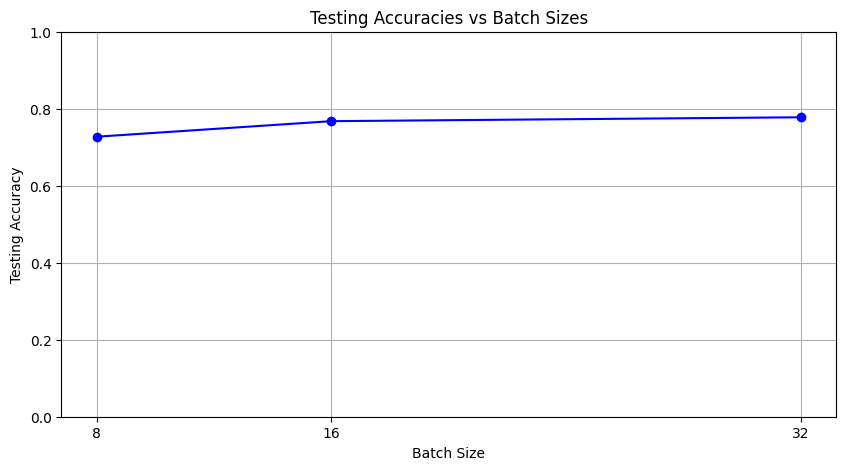

In [1565]:
batch_sizes = [result['batch_size'] for result in results_batch_size]
test_accuracies = [result['test_accuracy'] for result in results_batch_size]

plt.figure(figsize=(10, 5))
plt.plot(batch_sizes, test_accuracies, marker='o', linestyle='-', color='b')
plt.title('Testing Accuracies vs Batch Sizes')
plt.xlabel('Batch Size')
plt.ylabel('Testing Accuracy')
plt.xticks(batch_sizes) 
plt.grid()
plt.ylim(0, 1)
plt.show()

**Choosing learning rate as hyper parameter**

In [1566]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        
        self.fc1 = nn.Linear(7, 256)  # Input layer
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.3)

        self.fc2 = nn.Linear(256, 128)  # Hidden layers
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.3)

        self.fc3 = nn.Linear(128, 64)
        self.relu3 = nn.ReLU()
        self.dropout3 = nn.Dropout(0.3)

        self.fc4 = nn.Linear(64, 32)
        self.relu4 = nn.ReLU()
        self.dropout4 = nn.Dropout(0.3)

        self.fc5 = nn.Linear(32, 1)  # Output layer
        self.sigmoid = nn.Sigmoid()  # Using sigmoid because of Binary Target

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.dropout3(x)
        x = self.fc4(x)
        x = self.relu4(x)
        x = self.dropout4(x)
        x = self.fc5(x)
        x = self.sigmoid(x)
        return x

#Different learning rates
learning_rates = [0.1, 0.01, 0.001]
results_learning_rate = []

loss_function = nn.BCELoss()
batch_size = 16
num_epochs = 500

for lr in learning_rates:
    model = NeuralNetwork()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    summary(model, input_size=(1, 7))

    best_val_loss = float('inf')
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    start_time = time.time()

    for epoch in range(num_epochs):
        model.train()
        training_loss = 0.0
        correct_predictions = 0
        total_predictions = 0

        for inputs, labels in train_loader:
            outputs = model(inputs).squeeze()
            loss = loss_function(outputs, labels.float())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            training_loss += loss.item()
            predicted = torch.round(outputs)
            correct_predictions += (predicted == labels).sum().item()
            total_predictions += labels.size(0)

        train_losses.append(training_loss / len(train_loader))
        train_accuracies.append(correct_predictions / total_predictions)

        model.eval()
        val_loss = 0.0
        val_correct_predictions = 0
        val_total_predictions = 0
        with torch.no_grad():
            for val_inputs, val_labels in val_loader:
                val_outputs = model(val_inputs).squeeze()
                val_outputs = val_outputs.view(-1)  
                val_loss += loss_function(val_outputs, val_labels.float()).item()
                predicted = torch.round(val_outputs)
                val_correct_predictions += (predicted == val_labels).sum().item()
                val_total_predictions += val_labels.size(0)

            val_losses.append(val_loss / len(val_loader))
            val_accuracies.append(val_correct_predictions / val_total_predictions)

        average_training_loss = training_loss / len(train_loader)
        average_validation_loss = val_loss / len(val_loader)
        training_accuracy = correct_predictions / total_predictions
        validation_accuracy = val_correct_predictions / val_total_predictions

        print(f'Epoch [{epoch + 1}/{num_epochs}], '
              f'Training Loss: {average_training_loss:.4f}, '
              f'Validation Loss: {average_validation_loss:.4f}, '
              f'Training Accuracy: {training_accuracy:.4f}, '
              f'Validation Accuracy: {validation_accuracy:.4f}')

        if average_validation_loss < best_val_loss:
            best_val_loss = average_validation_loss
            torch.save(model.state_dict(), 'best_model_weights.pth')

    end_time = time.time()
    print(f'Training Time: {end_time - start_time:.2f} seconds')

    # Testing the model
    model.load_state_dict(torch.load('best_model_weights.pth'))

    test_losses = []
    test_accuracies = []

    for epoch in range(num_epochs):
        model.eval()
        test_loss = 0.0
        test_correct_predictions = 0
        test_total_predictions = 0

        confusion_predictions = []
        confusion_labels = []

        with torch.no_grad():
            for test_inputs, test_labels in test_loader:
                test_outputs = model(test_inputs).squeeze()
                test_outputs = test_outputs.view(-1)  
                test_loss += loss_function(test_outputs, test_labels.float()).item()
                
                predicted = torch.round(test_outputs)
                test_correct_predictions += (predicted == test_labels.float()).sum().item()
                test_total_predictions += test_labels.size(0)
            
                confusion_predictions.extend(predicted.numpy())
                confusion_labels.extend(test_labels.numpy())

            test_losses.append(test_loss / len(test_loader))
            test_accuracies.append(test_correct_predictions / test_total_predictions)

        avg_test_loss = test_loss / len(test_loader)
        test_accuracy = test_correct_predictions / test_total_predictions

        print(f'Epoch [{epoch + 1}/{num_epochs}], '
              f'Test Loss: {avg_test_loss:.4f}, '
              f'Testing Accuracy: {test_accuracy:.4f}')

    results_learning_rate.append({
        'learning_rate': lr,
        'train_accuracy': training_accuracy,
        'val_accuracy': validation_accuracy,
        'test_accuracy': test_accuracy
    })

# Print or save the results
for result in results_learning_rate:
    print(f"Learning Rate: {result['learning_rate']}, "
          f"Training Accuracy: {result['train_accuracy']:.4f}, "
          f"Validation Accuracy: {result['val_accuracy']:.4f}, "
          f"Testing Accuracy: {result['test_accuracy']:.4f}")


Epoch [1/500], Training Loss: 3.4222, Validation Loss: 0.6354, Training Accuracy: 0.5737, Validation Accuracy: 0.5730
Epoch [2/500], Training Loss: 2.4506, Validation Loss: 0.6946, Training Accuracy: 0.5350, Validation Accuracy: 0.5056
Epoch [3/500], Training Loss: 1.0806, Validation Loss: 0.7035, Training Accuracy: 0.4938, Validation Accuracy: 0.4944
Epoch [4/500], Training Loss: 0.7734, Validation Loss: 0.6947, Training Accuracy: 0.5088, Validation Accuracy: 0.5056
Epoch [5/500], Training Loss: 1.7634, Validation Loss: 0.6921, Training Accuracy: 0.5050, Validation Accuracy: 0.4944
Epoch [6/500], Training Loss: 0.6977, Validation Loss: 0.6933, Training Accuracy: 0.4988, Validation Accuracy: 0.5056
Epoch [7/500], Training Loss: 0.6934, Validation Loss: 0.6936, Training Accuracy: 0.4988, Validation Accuracy: 0.4944
Epoch [8/500], Training Loss: 0.6953, Validation Loss: 0.6936, Training Accuracy: 0.5050, Validation Accuracy: 0.5056
Epoch [9/500], Training Loss: 0.6938, Validation Loss: 0

/var/folders/3g/v5ysl19s0hbdkdprhb3xqd4r0000gn/T/ipykernel_34536/745533526.py:118: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model

Epoch [366/500], Test Loss: 0.6677, Testing Accuracy: 0.5455
Epoch [367/500], Test Loss: 0.6677, Testing Accuracy: 0.5455
Epoch [368/500], Test Loss: 0.6677, Testing Accuracy: 0.5455
Epoch [369/500], Test Loss: 0.6677, Testing Accuracy: 0.5455
Epoch [370/500], Test Loss: 0.6677, Testing Accuracy: 0.5455
Epoch [371/500], Test Loss: 0.6677, Testing Accuracy: 0.5455
Epoch [372/500], Test Loss: 0.6677, Testing Accuracy: 0.5455
Epoch [373/500], Test Loss: 0.6677, Testing Accuracy: 0.5455
Epoch [374/500], Test Loss: 0.6677, Testing Accuracy: 0.5455
Epoch [375/500], Test Loss: 0.6677, Testing Accuracy: 0.5455
Epoch [376/500], Test Loss: 0.6677, Testing Accuracy: 0.5455
Epoch [377/500], Test Loss: 0.6677, Testing Accuracy: 0.5455
Epoch [378/500], Test Loss: 0.6677, Testing Accuracy: 0.5455
Epoch [379/500], Test Loss: 0.6677, Testing Accuracy: 0.5455
Epoch [380/500], Test Loss: 0.6677, Testing Accuracy: 0.5455
Epoch [381/500], Test Loss: 0.6677, Testing Accuracy: 0.5455
Epoch [382/500], Test Lo

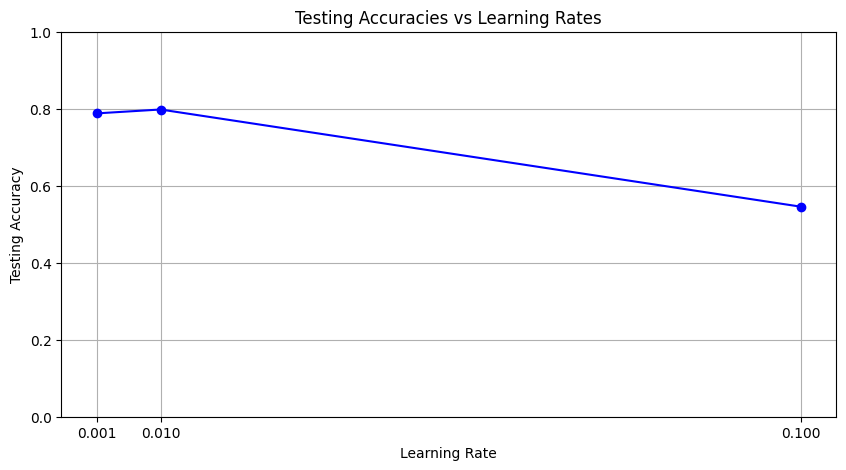

In [1567]:
learning_rates = [result['learning_rate'] for result in results_learning_rate]
test_accuracies = [result['test_accuracy'] for result in results_learning_rate]

plt.figure(figsize=(10, 5))
plt.plot(learning_rates, test_accuracies, marker='o', linestyle='-', color='b')
plt.title('Testing Accuracies vs Learning Rates')
plt.xlabel('Learning Rate')
plt.ylabel('Testing Accuracy')
plt.xticks(learning_rates)
plt.grid()
plt.ylim(0, 1)
plt.show()

In [1568]:
start_time = time.time()
best_val_loss = float('inf')
num_epochs = 500

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []
test_losses = []
test_accuracies = []

**Implementing Early Stopping**

In [1569]:
patience = 50
no_improvement_count = 0

for epoch in range(num_epochs): 
    model.train()
    training_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    for inputs, labels in train_loader:
        outputs = model(inputs).squeeze()
        loss = loss_function(outputs, labels.float())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        training_loss += loss.item()
        predicted = torch.round(outputs)
        correct_predictions += (predicted == labels).sum().item()
        total_predictions += labels.size(0)

    train_losses.append(training_loss / len(train_loader))
    train_accuracies.append(correct_predictions / total_predictions)

    model.eval()
    val_loss = 0.0
    val_correct_predictions = 0
    val_total_predictions = 0
    with torch.no_grad():
        for val_inputs, val_labels in val_loader:
            val_outputs = model(val_inputs).squeeze()
            val_loss += loss_function(val_outputs, val_labels.float()).item()
            predicted = torch.round(val_outputs)
            val_correct_predictions += (predicted == val_labels).sum().item()
            val_total_predictions += val_labels.size(0)

        val_losses.append(val_loss / len(val_loader))
        val_accuracies.append(val_correct_predictions / val_total_predictions)

    average_training_loss = training_loss / len(train_loader)
    average_validation_loss = val_loss / len(val_loader)
    training_accuracy = correct_predictions / total_predictions
    validation_accuracy = val_correct_predictions / val_total_predictions

    print(f'Epoch [{epoch + 1}/{num_epochs}], '
          f'Training Loss: {average_training_loss:.4f}, '
          f'Validation Loss: {average_validation_loss:.4f}, '
          f'Training Accuracy: {training_accuracy:.4f}, '
          f'Validation Accuracy: {validation_accuracy:.4f}')

    if average_validation_loss < best_val_loss:
        best_val_loss = average_validation_loss
        no_improvement_count = 0  
        torch.save(model.state_dict(), 'best_model_weights.pth')  
    else:
        no_improvement_count += 1

    if no_improvement_count >= patience:
        print(f"Early stopping at epoch {epoch + 1}. No improvement in validation loss for {patience} epochs.")
        break

model.load_state_dict(torch.load('best_model_weights.pth'))


num_test_epochs = 1
for epoch in range(num_test_epochs):
    model.eval()
    test_loss = 0.0
    test_correct_predictions = 0
    test_total_predictions = 0

    confusion_predictions = []
    confusion_labels = []

    with torch.no_grad():
        for test_inputs, test_labels in test_loader:
            test_outputs = model(test_inputs).squeeze()
            test_loss += loss_function(test_outputs, test_labels.float()).item()

            predicted = torch.round(test_outputs)
            test_correct_predictions += (predicted == test_labels.float()).sum().item()
            test_total_predictions += test_labels.size(0)

            confusion_predictions.extend(predicted.cpu().numpy())
            confusion_labels.extend(test_labels.cpu().numpy()) 

        test_losses.append(test_loss / len(test_loader)) 
        test_accuracies.append(test_correct_predictions / test_total_predictions) 

    avg_test_loss = test_loss / len(test_loader)
    test_accuracy = test_correct_predictions / test_total_predictions

    print(f'Epoch [{epoch + 1}/{num_test_epochs}], '
          f'Test Loss: {avg_test_loss:.4f}, '
          f'Testing Accuracy: {test_accuracy:.4f}')

Epoch [1/500], Training Loss: 0.3470, Validation Loss: 0.4597, Training Accuracy: 0.8450, Validation Accuracy: 0.8315
Epoch [2/500], Training Loss: 0.3259, Validation Loss: 0.5044, Training Accuracy: 0.8600, Validation Accuracy: 0.7865
Epoch [3/500], Training Loss: 0.3316, Validation Loss: 0.4709, Training Accuracy: 0.8337, Validation Accuracy: 0.8202
Epoch [4/500], Training Loss: 0.3300, Validation Loss: 0.4960, Training Accuracy: 0.8488, Validation Accuracy: 0.7978
Epoch [5/500], Training Loss: 0.3171, Validation Loss: 0.4644, Training Accuracy: 0.8650, Validation Accuracy: 0.7978
Epoch [6/500], Training Loss: 0.3246, Validation Loss: 0.4897, Training Accuracy: 0.8550, Validation Accuracy: 0.7753
Epoch [7/500], Training Loss: 0.3003, Validation Loss: 0.5255, Training Accuracy: 0.8588, Validation Accuracy: 0.8202
Epoch [8/500], Training Loss: 0.2921, Validation Loss: 0.5067, Training Accuracy: 0.8750, Validation Accuracy: 0.7640
Epoch [9/500], Training Loss: 0.3177, Validation Loss: 0

/var/folders/3g/v5ysl19s0hbdkdprhb3xqd4r0000gn/T/ipykernel_34536/1621870245.py:62: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model

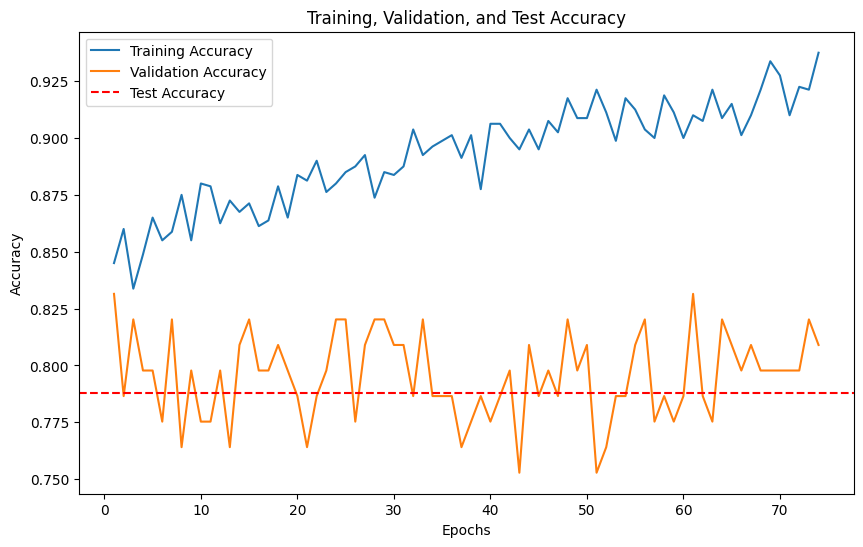

In [1570]:
plt.figure(figsize=(10, 6))
epochs = range(1, len(train_accuracies) + 1)
plt.plot(epochs, train_accuracies, label='Training Accuracy')
plt.plot(epochs, val_accuracies, label='Validation Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.legend()
plt.show()

**Implementing Learning Rate Scheduler**

In [1571]:
#scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=20, verbose=True)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

start_time = time.time()

for epoch in range(num_epochs):
    model.train()
    training_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    for inputs, labels in train_loader:
        outputs = model(inputs).squeeze()
        loss = loss_function(outputs, labels.float())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        training_loss += loss.item()
        predicted = torch.round(outputs)
        correct_predictions += (predicted == labels).sum().item()
        total_predictions += labels.size(0)

    train_losses.append(training_loss / len(train_loader))
    train_accuracies.append(correct_predictions / total_predictions)

    model.eval()
    val_loss = 0.0
    val_correct_predictions = 0
    val_total_predictions = 0
    with torch.no_grad():
        for val_inputs, val_labels in val_loader:
            val_outputs = model(val_inputs).squeeze()
            val_loss += loss_function(val_outputs, val_labels.float()).item()
            predicted = torch.round(val_outputs)
            val_correct_predictions += (predicted == val_labels).sum().item()
            val_total_predictions += val_labels.size(0)

        val_losses.append(val_loss / len(val_loader))
        val_accuracies.append(val_correct_predictions / val_total_predictions)

    average_training_loss = training_loss / len(train_loader)
    average_validation_loss = val_loss / len(val_loader)
    training_accuracy = correct_predictions / total_predictions
    validation_accuracy = val_correct_predictions / val_total_predictions

    print(f'Epoch [{epoch + 1}/{num_epochs}], '
          f'Training Loss: {average_training_loss:.4f}, '
          f'Validation Loss: {average_validation_loss:.4f}, '
          f'Training Accuracy: {training_accuracy:.4f}, '
          f'Validation Accuracy: {validation_accuracy:.4f}')

    if average_validation_loss < best_val_loss:
        best_val_loss = average_validation_loss
        torch.save(model.state_dict(), 'best_model_weights.pth')

    scheduler.step(validation_accuracy)

end_time = time.time()
print(f'Training Time: {end_time - start_time:.2f} seconds')

model.load_state_dict(torch.load('best_model_weights.pth'))

# Testing the model
test_losses = []
test_accuracies = []

model.eval()
test_loss = 0.0
test_correct_predictions = 0
test_total_predictions = 0

confusion_predictions = []
confusion_labels = []

with torch.no_grad():
    for test_inputs, test_labels in test_loader:
        test_outputs = model(test_inputs).squeeze()
        test_loss += loss_function(test_outputs, test_labels.float()).item()
        
        predicted = torch.round(test_outputs)
        test_correct_predictions += (predicted == test_labels.float()).sum().item()
        test_total_predictions += test_labels.size(0)
    
       
        confusion_predictions.extend(predicted.cpu().numpy())
        confusion_labels.extend(test_labels.cpu().numpy())

    test_losses.append(test_loss / len(test_loader))
    test_accuracies.append(test_correct_predictions / test_total_predictions)

avg_test_loss = test_loss / len(test_loader)
test_accuracy = test_correct_predictions / test_total_predictions

print(f'Test Loss: {avg_test_loss:.4f}, '
      f'Testing Accuracy: {test_accuracy:.4f}')


Epoch [1/500], Training Loss: 0.2504, Validation Loss: 0.4921, Training Accuracy: 0.8912, Validation Accuracy: 0.7865
Epoch [2/500], Training Loss: 0.2417, Validation Loss: 0.4659, Training Accuracy: 0.8962, Validation Accuracy: 0.7978


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:232: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Epoch [3/500], Training Loss: 0.2529, Validation Loss: 0.5206, Training Accuracy: 0.8962, Validation Accuracy: 0.7865
Epoch [4/500], Training Loss: 0.2675, Validation Loss: 0.5012, Training Accuracy: 0.8825, Validation Accuracy: 0.7978
Epoch [5/500], Training Loss: 0.2618, Validation Loss: 0.4998, Training Accuracy: 0.8900, Validation Accuracy: 0.7978
Epoch [6/500], Training Loss: 0.2417, Validation Loss: 0.5081, Training Accuracy: 0.8950, Validation Accuracy: 0.7865
Epoch [7/500], Training Loss: 0.2446, Validation Loss: 0.5095, Training Accuracy: 0.8975, Validation Accuracy: 0.7865
Epoch [8/500], Training Loss: 0.2467, Validation Loss: 0.5280, Training Accuracy: 0.8988, Validation Accuracy: 0.7640
Epoch [9/500], Training Loss: 0.2489, Validation Loss: 0.5310, Training Accuracy: 0.9050, Validation Accuracy: 0.7753
Epoch [10/500], Training Loss: 0.2341, Validation Loss: 0.5522, Training Accuracy: 0.9062, Validation Accuracy: 0.7865
Epoch [11/500], Training Loss: 0.2482, Validation Loss:

/var/folders/3g/v5ysl19s0hbdkdprhb3xqd4r0000gn/T/ipykernel_34536/1268722804.py:63: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model

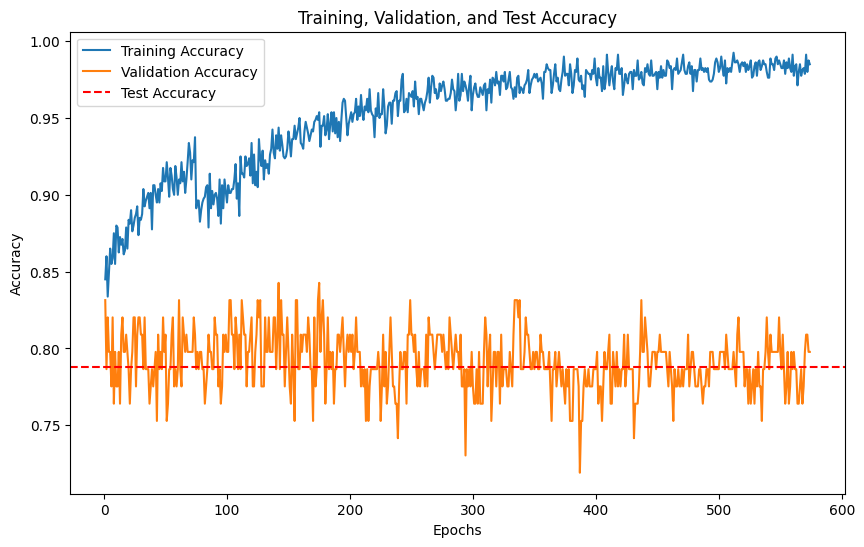

In [1572]:
plt.figure(figsize=(10, 6))
epochs = range(1, len(train_accuracies) + 1)
plt.plot(epochs, train_accuracies, label='Training Accuracy')
plt.plot(epochs, val_accuracies, label='Validation Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.legend()
plt.show()

**Implementing Gradient Accumulation method**

In [1573]:
accumulation_steps = 4

for epoch in range(num_epochs):
    model.train()
    training_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    optimizer.zero_grad()  

    for i, (inputs, labels) in enumerate(train_loader):
        outputs = model(inputs).squeeze()
        loss = loss_function(outputs, labels.float())
        loss = loss / accumulation_steps  
        loss.backward()

        if (i + 1) % accumulation_steps == 0:
            optimizer.step()
            optimizer.zero_grad()

        training_loss += loss.item() * accumulation_steps 
        predicted = torch.round(outputs)
        correct_predictions += (predicted == labels).sum().item()
        total_predictions += labels.size(0)

    train_losses.append(training_loss / len(train_loader))
    train_accuracies.append(correct_predictions / total_predictions)

    model.eval()
    val_loss = 0.0
    val_correct_predictions = 0
    val_total_predictions = 0
    with torch.no_grad():
        for val_inputs, val_labels in val_loader:
            val_outputs = model(val_inputs).squeeze()
            val_loss += loss_function(val_outputs, val_labels.float()).item()
            predicted = torch.round(val_outputs)
            val_correct_predictions += (predicted == val_labels).sum().item()
            val_total_predictions += val_labels.size(0)

        val_losses.append(val_loss / len(val_loader))
        val_accuracies.append(val_correct_predictions / val_total_predictions)

    average_training_loss = training_loss / len(train_loader)
    average_validation_loss = val_loss / len(val_loader)
    training_accuracy = correct_predictions / total_predictions
    validation_accuracy = val_correct_predictions / val_total_predictions

    print(f'Epoch [{epoch + 1}/{num_epochs}], '
          f'Training Loss: {average_training_loss:.4f}, '
          f'Validation Loss: {average_validation_loss:.4f}, '
          f'Training Accuracy: {training_accuracy:.4f}, '
          f'Validation Accuracy: {validation_accuracy:.4f}')

    if average_validation_loss < best_val_loss:
        best_val_loss = average_validation_loss
        torch.save(model.state_dict(), 'best_model_weights.pth')

end_time = time.time()
print(f'Training Time: {end_time - start_time:.2f} seconds')
model.load_state_dict(torch.load('best_model_weights.pth'))

num_epochss = 600
for epoch in range(num_epochss):
    model.eval()
    test_loss = 0.0
    test_correct_predictions = 0
    test_total_predictions = 0

    confusion_predictions = []
    confusion_labels = []

    with torch.no_grad():
        for test_inputs, test_labels in test_loader:
            test_outputs = model(test_inputs).squeeze()
            test_loss += loss_function(test_outputs, test_labels.float()).item()
            
            predicted = torch.round(test_outputs)
            test_correct_predictions += (predicted == test_labels.float()).sum().item()
            test_total_predictions += test_labels.size(0)
        
            confusion_predictions.extend(predicted.numpy())  #for confusion matrix
            confusion_labels.extend(test_labels.numpy())  #actual class labels

        test_losses.append(test_loss / len(test_loader))  # Gives the average loss per batch
        test_accuracies.append(test_correct_predictions / test_total_predictions)  # ratio of correct preds / total preds -> accuracy

    avg_test_loss = test_loss / len(test_loader)
    test_accuracy = test_correct_predictions / test_total_predictions

    print(f'Epoch [{epoch + 1}/{num_epochss}], '
            f'Test Loss: {avg_test_loss:.4f}, '
            f'Testing Accuracy: {test_accuracy:.4f}, ')

Epoch [1/500], Training Loss: 0.2685, Validation Loss: 0.4622, Training Accuracy: 0.8862, Validation Accuracy: 0.7978
Epoch [2/500], Training Loss: 0.2440, Validation Loss: 0.4899, Training Accuracy: 0.9038, Validation Accuracy: 0.7865
Epoch [3/500], Training Loss: 0.2382, Validation Loss: 0.5130, Training Accuracy: 0.9012, Validation Accuracy: 0.7978
Epoch [4/500], Training Loss: 0.2429, Validation Loss: 0.5126, Training Accuracy: 0.8900, Validation Accuracy: 0.7978
Epoch [5/500], Training Loss: 0.2399, Validation Loss: 0.5095, Training Accuracy: 0.8962, Validation Accuracy: 0.7978
Epoch [6/500], Training Loss: 0.2428, Validation Loss: 0.5096, Training Accuracy: 0.9038, Validation Accuracy: 0.7978
Epoch [7/500], Training Loss: 0.2715, Validation Loss: 0.4900, Training Accuracy: 0.8875, Validation Accuracy: 0.7865
Epoch [8/500], Training Loss: 0.2453, Validation Loss: 0.4832, Training Accuracy: 0.8862, Validation Accuracy: 0.7753
Epoch [9/500], Training Loss: 0.2425, Validation Loss: 0

/var/folders/3g/v5ysl19s0hbdkdprhb3xqd4r0000gn/T/ipykernel_34536/2037389910.py:61: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model

Epoch [2/600], Test Loss: 0.7229, Testing Accuracy: 0.7879, 
Epoch [3/600], Test Loss: 0.7229, Testing Accuracy: 0.7879, 
Epoch [4/600], Test Loss: 0.7229, Testing Accuracy: 0.7879, 
Epoch [5/600], Test Loss: 0.7229, Testing Accuracy: 0.7879, 
Epoch [6/600], Test Loss: 0.7229, Testing Accuracy: 0.7879, 
Epoch [7/600], Test Loss: 0.7229, Testing Accuracy: 0.7879, 
Epoch [8/600], Test Loss: 0.7229, Testing Accuracy: 0.7879, 
Epoch [9/600], Test Loss: 0.7229, Testing Accuracy: 0.7879, 
Epoch [10/600], Test Loss: 0.7229, Testing Accuracy: 0.7879, 
Epoch [11/600], Test Loss: 0.7229, Testing Accuracy: 0.7879, 
Epoch [12/600], Test Loss: 0.7229, Testing Accuracy: 0.7879, 
Epoch [13/600], Test Loss: 0.7229, Testing Accuracy: 0.7879, 
Epoch [14/600], Test Loss: 0.7229, Testing Accuracy: 0.7879, 
Epoch [15/600], Test Loss: 0.7229, Testing Accuracy: 0.7879, 
Epoch [16/600], Test Loss: 0.7229, Testing Accuracy: 0.7879, 
Epoch [17/600], Test Loss: 0.7229, Testing Accuracy: 0.7879, 
Epoch [18/600], 

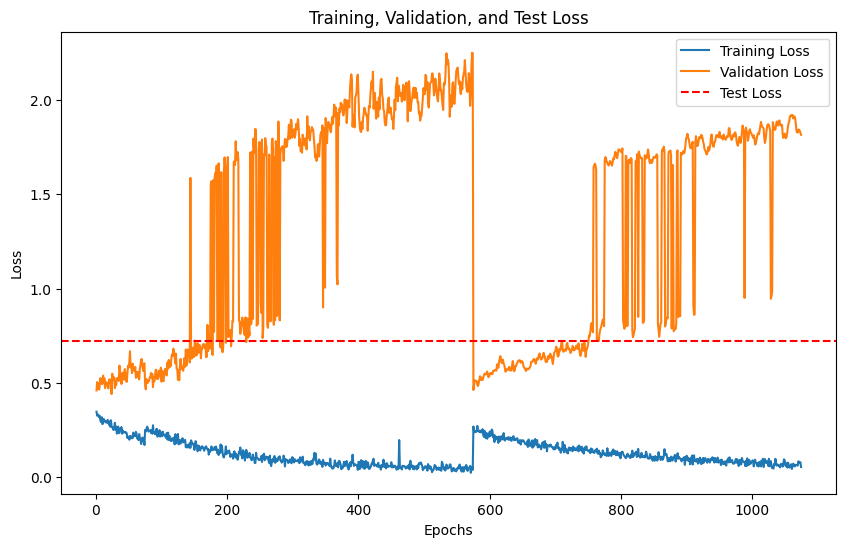

In [1574]:
plt.figure(figsize=(10, 6))
epochs = range(1, len(train_accuracies) + 1)
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.axhline(y=avg_test_loss, color='r', linestyle='--', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training, Validation, and Test Loss')
plt.legend()
plt.show()

**Implementing Batch Normalization method**

In [1575]:
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=50)

for epoch in range(num_epochs): #defining the training loop
    
    model.train() #model in training mode
    training_loss = 0.0
    correct_predictions = 0
    total_predictions = 0 
    for inputs, labels in train_loader:

        outputs = model(inputs).squeeze()  # output -> predictions   :   labels -> actual values [ 1 or 0 ]
        loss = loss_function(outputs, labels.float())  # loss is calsulated between predicted and the actual values
        optimizer.zero_grad()  # Before backpropagation, initialize all weights to zero 
        loss.backward()  # performs backward propagation
        optimizer.step()  # updates the parameters learnt from backpropagation (weights)

        training_loss += loss.item()  # .item() - extracts the scalar value of the loss tensor. Loss is calculated per batch

        predicted = torch.round(outputs)  # Convert probabilities to binary predictions 
        correct_predictions += (predicted == labels).sum().item()  #creates a tensor oa maps how many actually match that conditon
        total_predictions += labels.size(0)  #first dimension of the tensor

    train_losses.append(training_loss / len(train_loader))  #for loss calculation
    train_accuracies.append(correct_predictions / total_predictions)


    model.eval()  #model in evaluation mode
    val_loss = 0.0
    val_correct_predictions = 0
    val_total_predictions = 0
    with torch.no_grad():
        for val_inputs, val_labels in val_loader:
            val_outputs = model(val_inputs).squeeze()
            val_loss += loss_function(val_outputs, val_labels.float()).item()

            predicted = torch.round(val_outputs)
            val_correct_predictions += (predicted == val_labels).sum().item()
            val_total_predictions += val_labels.size(0)

        val_losses.append(val_loss / len(val_loader))
        val_accuracies.append(val_correct_predictions / val_total_predictions)

    average_training_loss = training_loss / len(train_loader)  #loss per batch
    average_validation_loss = val_loss / len(val_loader)
    training_accuracy = correct_predictions / total_predictions  
    validation_accuracy = val_correct_predictions / val_total_predictions

    print(f'Epoch [{epoch + 1}/{num_epochs}], '
            f'Training Loss: {average_training_loss:.4f}, '
            f'Validation Loss: {average_validation_loss:.4f}, '
            f'Training Accuracy: {training_accuracy:.4f}, '
            f'Validation Accuracy: {validation_accuracy:.4f}')
    
    if average_validation_loss < best_val_loss:
        best_val_loss = average_validation_loss
        torch.save(model.state_dict(), 'best_model_weights.pth')

    scheduler.step()

end_time = time.time()
print(f'Training Time: {end_time - start_time:.2f} seconds')


model.load_state_dict(torch.load('best_model_weights.pth'))

num_epochss = 600
for epoch in range(num_epochss):
    model.eval()
    test_loss = 0.0
    test_correct_predictions = 0
    test_total_predictions = 0

    confusion_predictions = []
    confusion_labels = []

    with torch.no_grad():
        for test_inputs, test_labels in test_loader:
            test_outputs = model(test_inputs).squeeze()
            test_loss += loss_function(test_outputs, test_labels.float()).item()
            
            predicted = torch.round(test_outputs)
            test_correct_predictions += (predicted == test_labels.float()).sum().item()
            test_total_predictions += test_labels.size(0)
        
            confusion_predictions.extend(predicted.numpy())  #for confusion matrix
            confusion_labels.extend(test_labels.numpy())  #actual class labels

        test_losses.append(test_loss / len(test_loader))  # Gives the average loss per batch
        test_accuracies.append(test_correct_predictions / test_total_predictions)  # ratio of correct preds / total preds -> accuracy

    avg_test_loss = test_loss / len(test_loader)
    test_accuracy = test_correct_predictions / test_total_predictions

    print(f'Epoch [{epoch + 1}/{num_epochss}], '
            f'Test Loss: {avg_test_loss:.4f}, '
            f'Testing Accuracy: {test_accuracy:.4f}, ')

Epoch [1/500], Training Loss: 0.2459, Validation Loss: 0.5279, Training Accuracy: 0.8912, Validation Accuracy: 0.7978
Epoch [2/500], Training Loss: 0.2699, Validation Loss: 0.5111, Training Accuracy: 0.8875, Validation Accuracy: 0.7753
Epoch [3/500], Training Loss: 0.2648, Validation Loss: 0.5691, Training Accuracy: 0.8900, Validation Accuracy: 0.7640
Epoch [4/500], Training Loss: 0.2860, Validation Loss: 0.5245, Training Accuracy: 0.8838, Validation Accuracy: 0.7978
Epoch [5/500], Training Loss: 0.2919, Validation Loss: 0.4715, Training Accuracy: 0.8738, Validation Accuracy: 0.8090
Epoch [6/500], Training Loss: 0.2673, Validation Loss: 0.4956, Training Accuracy: 0.8862, Validation Accuracy: 0.7978
Epoch [7/500], Training Loss: 0.2648, Validation Loss: 0.5116, Training Accuracy: 0.8812, Validation Accuracy: 0.8090
Epoch [8/500], Training Loss: 0.2782, Validation Loss: 0.4926, Training Accuracy: 0.8825, Validation Accuracy: 0.7978
Epoch [9/500], Training Loss: 0.2858, Validation Loss: 0

/var/folders/3g/v5ysl19s0hbdkdprhb3xqd4r0000gn/T/ipykernel_34536/3941992981.py:64: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model

Epoch [366/600], Test Loss: 0.7229, Testing Accuracy: 0.7879, 
Epoch [367/600], Test Loss: 0.7229, Testing Accuracy: 0.7879, 
Epoch [368/600], Test Loss: 0.7229, Testing Accuracy: 0.7879, 
Epoch [369/600], Test Loss: 0.7229, Testing Accuracy: 0.7879, 
Epoch [370/600], Test Loss: 0.7229, Testing Accuracy: 0.7879, 
Epoch [371/600], Test Loss: 0.7229, Testing Accuracy: 0.7879, 
Epoch [372/600], Test Loss: 0.7229, Testing Accuracy: 0.7879, 
Epoch [373/600], Test Loss: 0.7229, Testing Accuracy: 0.7879, 
Epoch [374/600], Test Loss: 0.7229, Testing Accuracy: 0.7879, 
Epoch [375/600], Test Loss: 0.7229, Testing Accuracy: 0.7879, 
Epoch [376/600], Test Loss: 0.7229, Testing Accuracy: 0.7879, 
Epoch [377/600], Test Loss: 0.7229, Testing Accuracy: 0.7879, 
Epoch [378/600], Test Loss: 0.7229, Testing Accuracy: 0.7879, 
Epoch [379/600], Test Loss: 0.7229, Testing Accuracy: 0.7879, 
Epoch [380/600], Test Loss: 0.7229, Testing Accuracy: 0.7879, 
Epoch [381/600], Test Loss: 0.7229, Testing Accuracy: 0

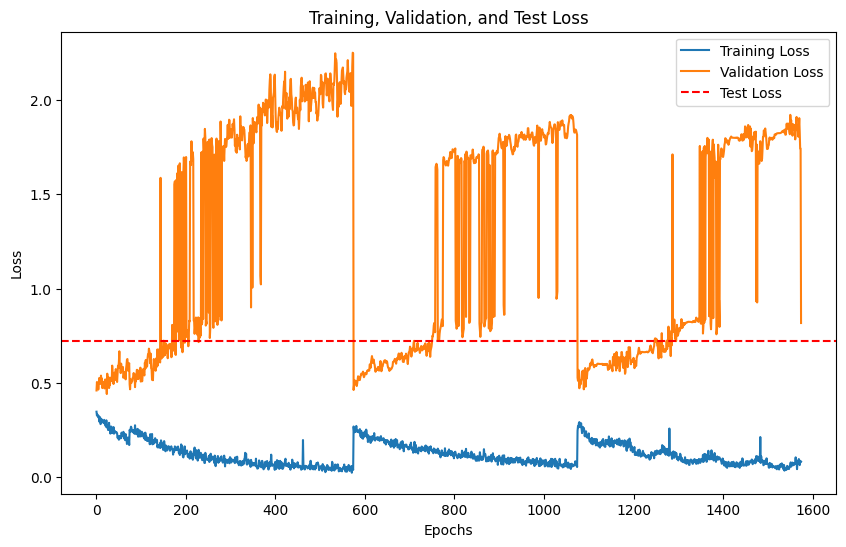

In [1576]:
plt.figure(figsize=(10, 6))
epochs = range(1, len(train_accuracies) + 1)
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.axhline(y=avg_test_loss, color='r', linestyle='--', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training, Validation, and Test Loss')
plt.legend()
plt.show()

Graph - comparing the test accuracy between the base model and the improved model

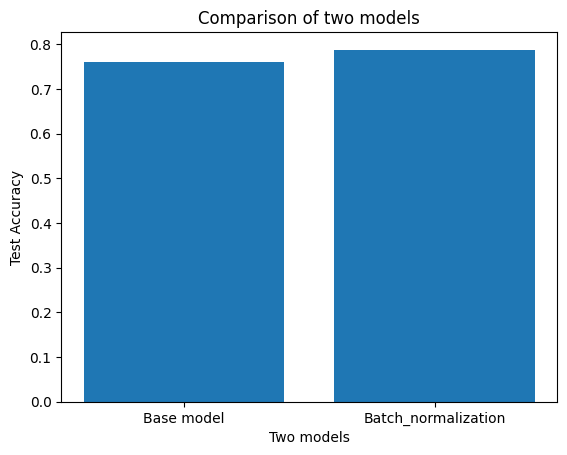

In [1578]:
improved_test_acc = 0.7879
base_test_acc = 0.7608

models = ["Base model" , "Batch_normalization"]

plt.bar(models, [base_test_acc,improved_test_acc ])
plt.xlabel("Two models")
plt.ylabel("Test Accuracy")
plt.title("Comparison of two models")
plt.show()

REFERENCES

Class lecture slides

https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html